In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Factibilidade Gurobi
gb = pd.read_csv('../solve_gurobi/classify_factibilidade.csv')
gb = gb[['Instancia', 'Plantas', 'Produtos', 'Status', 'N_solutions']]
gb['Feasible'] = gb['N_solutions'].apply(lambda x: 1 if x > 0 else 0)

In [3]:
gb.head(20)

,Instancia,Plantas,Produtos,Status,N_solutions,Feasible
0,AAA00_12_2_5,2,5,3,0,0
1,AAA00_12_2_10,2,10,3,0,0
2,AAA00_12_2_15,2,15,3,0,0
3,AAA00_12_2_20,2,20,3,0,0
4,AAA00_12_2_50,2,50,3,0,0
5,AAA00_12_2_75,2,75,3,0,0
6,AAA00_12_2_100,2,100,3,0,0
7,AAA00_12_4_5,4,5,3,0,0
8,AAA00_12_4_10,4,10,3,0,0
9,AAA00_12_4_15,4,15,10,1,1


In [4]:
# Factibilidade na relax-and-fix 1_0
rf = pd.read_csv('../solve_relax_and_fix/solve_relax_and_fix_1_0/analise_factibilidade.csv')
rf = rf[['Instancia', 'Plantas', 'Produtos', 'Status_last', 'N_solutions']]
rf['Feasible'] = rf['N_solutions'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
rf.head(20)

,Instancia,Plantas,Produtos,Status_last,N_solutions,Feasible
0,AAA00_12_2_5,2,5,3,0,0
1,AAA00_12_2_10,2,10,3,0,0
2,AAA00_12_2_15,2,15,3,0,0
3,AAA00_12_2_20,2,20,3,0,0
4,AAA00_12_2_50,2,50,3,0,0
5,AAA00_12_2_75,2,75,3,0,0
6,AAA00_12_2_100,2,100,3,0,0
7,AAA00_12_4_5,4,5,3,0,0
8,AAA00_12_4_10,4,10,3,0,0
9,AAA00_12_4_15,4,15,3,0,0


In [6]:
# Análises combinadas
df = gb.merge(rf, on=['Instancia', 'Plantas', 'Produtos'], suffixes=('_gb', '_rf'))

## Análise de factibilidade

Text(0, 0.5, 'Factível')

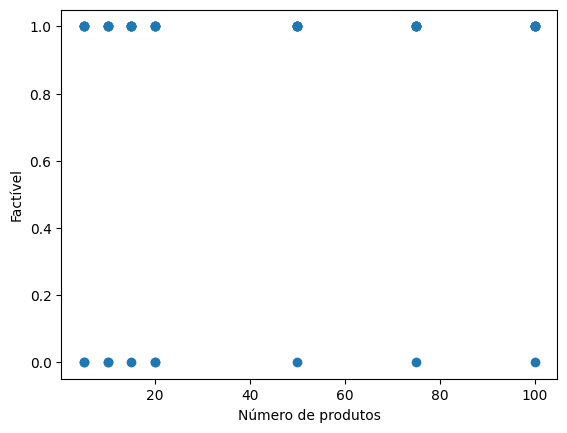

In [7]:
# Factibilidade em função do número de produtos
x = gb['Produtos']
y = gb['Feasible']

plt.scatter(x, y)
plt.xlabel('Número de produtos')
plt.ylabel('Factível')

Text(0, 0.5, 'Factível')

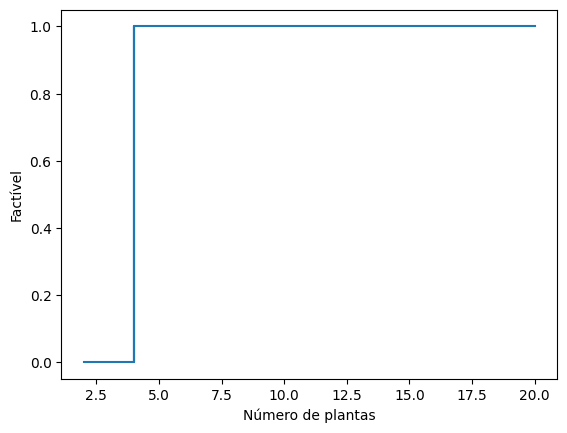

In [8]:
# Factibilidade em função do número de plantas
x = gb['Plantas']
y = gb['Feasible']

plt.plot(x, y)
plt.xlabel('Número de plantas')
plt.ylabel('Factível')

In [9]:
# Falha na relax-and-fix
df.loc[df['Feasible_gb'] != df['Feasible_rf']]

,Instancia,Plantas,Produtos,Status,N_solutions_gb,Feasible_gb,Status_last,N_solutions_rf,Feasible_rf
9,AAA00_12_4_15,4,15,10,1,1,3,0,0


## Análise do espaço de soluções

Text(0, 0.5, 'Número de soluções')

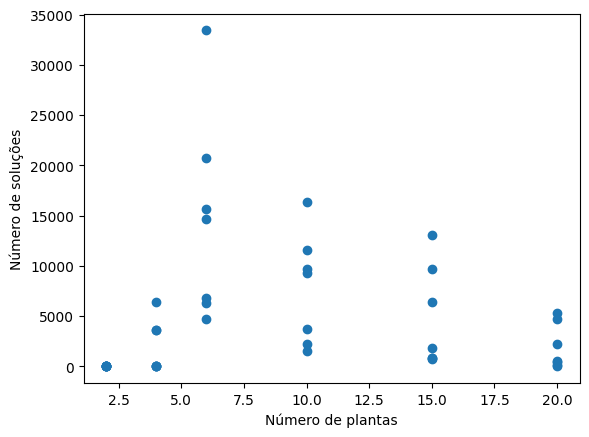

In [10]:
# Número de soluções em função do número de plantas
x = rf['Plantas']
y = rf['N_solutions']

plt.scatter(x, y)
plt.xlabel('Número de plantas')
plt.ylabel('Número de soluções')

Text(0, 0.5, 'Número de soluções')

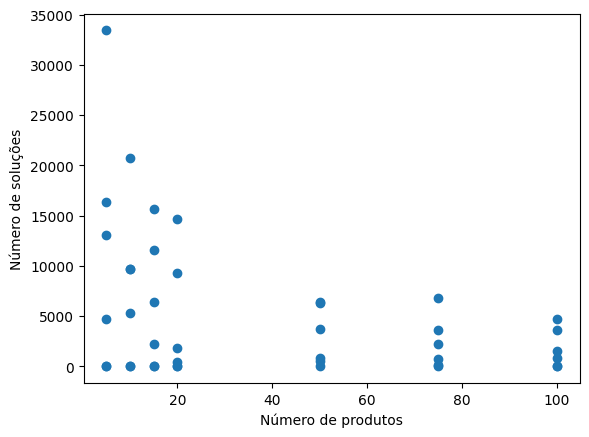

In [11]:
# Número de soluções em função do número de produtos
x = rf['Produtos']
y = rf['N_solutions']

plt.scatter(x, y)
plt.xlabel('Número de produtos')
plt.ylabel('Número de soluções')

In [12]:
rf

,Instancia,Plantas,Produtos,Status_last,N_solutions,Feasible
0,AAA00_12_2_5,2,5,3,0,0
1,AAA00_12_2_10,2,10,3,0,0
2,AAA00_12_2_15,2,15,3,0,0
3,AAA00_12_2_20,2,20,3,0,0
4,AAA00_12_2_50,2,50,3,0,0
5,AAA00_12_2_75,2,75,3,0,0
6,AAA00_12_2_100,2,100,3,0,0
7,AAA00_12_4_5,4,5,3,0,0
8,AAA00_12_4_10,4,10,3,0,0
9,AAA00_12_4_15,4,15,3,0,0
